In [16]:
import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import textblob
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
import patsy

In [17]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [18]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
voting_camps=pd.read_csv('pc_cluster.csv',error_bad_lines=False)


In [33]:
df2=category.groupby(['category']).symbol.nunique()

d=df2.sort_values(ascending=False)
d

category
Middle East                          840
Nuclear Disarmament                  774
Universal Human Rights               231
Decolonization                       221
Other                                123
South Africa                         102
Racial Discrimination                86 
UN Funding & Budget                  72 
Arm Race in Outer Space & Water      69 
Special Sessions                     56 
Law of the Sea                       56 
Science and Technology               53 
International Security               50 
Small Arms                           48 
Namibia                              43 
Peacemaking                          40 
Support to Developing Countries      39 
Lebanon                              39 
Environment                          33 
Cuba                                 32 
Iran                                 30 
Economic Order & Cooperation         26 
Yugoslavia                           20 
Africa                               17 
Democra

In [23]:
df2['category'].value_counts()

KeyError: 'category'

In [4]:
data=pd.merge(category,voting_camps, on=['country'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533103 entries, 0 to 533102
Data columns (total 21 columns):
symbol      533103 non-null object
title       533103 non-null object
descr1      533103 non-null object
category    533103 non-null object
year        533103 non-null int64
voted       533103 non-null object
country     533103 non-null object
date        533103 non-null object
PC1         533103 non-null float64
PC2         533103 non-null float64
PC3         533103 non-null float64
PC4         533103 non-null float64
PC5         533103 non-null float64
PC6         533103 non-null float64
PC7         533103 non-null float64
PC8         533103 non-null float64
PC9         533103 non-null float64
PC10        533103 non-null float64
PC11        533103 non-null float64
PC12        533103 non-null float64
cluster     533103 non-null int64
dtypes: float64(12), int64(2), object(7)
memory usage: 89.5+ MB


In [6]:
data.head(2)

,symbol,title,descr1,category,year,voted,country,date,PC1,PC2,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,cluster
0,A/RES/38/49,Information from Non-Self-Governing Territories transmitted under Article 73e of the Charter of the United Nations,informationfromnonselfgoverningterritoriestransmittedunderarticle73eofthecharteroftheunitednations,Decolonization,1983,Y,AFGHANISTAN,12/7/1983,-4.655167,8.91107,...,-1.049966,5.059861,-4.297626,4.708667,-7.031045,-0.032216,-4.537494,5.564996,27.261436,1
1,A/RES/38/39I,Investments in South Africa,investmentsinsouthafrica,South Africa,1983,Y,AFGHANISTAN,12/5/1983,-4.655167,8.91107,...,-1.049966,5.059861,-4.297626,4.708667,-7.031045,-0.032216,-4.537494,5.564996,27.261436,1


In [7]:
def coded_voted(voted):
    for x in voted:
        if voted=='Y':
            return 1
        if voted=='N':
            return -1
        if voted =='A':
            return 0
        
data['code_vote']=data['voted'].map(coded_voted)

In [8]:
cluster=data[data['cluster']==4]

cluster


,symbol,title,descr1,category,year,voted,country,date,PC1,PC2,...,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,cluster,code_vote
449424,A/RES/38/49,Information from Non-Self-Governing Territories transmitted under Article 73e of the Charter of the United Nations,informationfromnonselfgoverningterritoriestransmittedunderarticle73eofthecharteroftheunitednations,Decolonization,1983,A,UNITED STATES,12/7/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,0
449425,A/RES/38/39I,Investments in South Africa,investmentsinsouthafrica,South Africa,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449426,A/RES/38/39D,Sanctions against South Africa,sanctionsagainstsouthafrica,South Africa,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449427,A/RES/38/39J,Oil embargo against South Africa,oilembargoagainstsouthafrica,South Africa,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449428,A/RES/38/39E,Programme of work of the Special Committee against Apartheid,programmeofworkofthespecialcommitteeagainstapartheid,Racial Discrimination,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449429,A/RES/38/39G,Military and nuclear collaboration with South Africa,militaryandnuclearcollaborationwithsouthafrica,Nuclear Disarmament,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449430,A/RES/38/39K,Apartheid in Sports,apartheidinsports,Racial Discrimination,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449431,A/RES/38/39F,Relations between Israel and South Africa,relationsbetweenisraelandsouthafrica,South Africa,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449432,A/RES/38/39C,Effects of apartheid on the countries of southern Africa,effectsofapartheidonthecountriesofsouthernafrica,South Africa,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1
449433,A/RES/38/39B,Programme of Action against Apartheid,programmeofactionagainstapartheid,Racial Discrimination,1983,N,UNITED STATES,12/5/1983,117.758943,100.867343,...,-28.452646,-9.733951,-1.241141,0.630792,-1.708799,0.702984,-0.037881,0.298756,4,-1


In [9]:
def camp(cluster):
    if cluster==1:
        return "G77"
    if cluster==2:
        return 'ISRAEL'
    if cluster==3:
        return "WESTERN BLOCK"
    if cluster==4:
        return "UNITED STATES"
    else:
        return "PARTIAL EASTERN BLOCK"

data['camp']=data['cluster'].apply(camp)

In [13]:
df=data.query('category == ["Freedom of Information", "Eliminating Religious Intolerance","Removing Remnants of War","Small Arms","Terrorism"]')

In [14]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,count,126,1,12,1,35


In [15]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,Eliminating Religious Intolerance,0.735511,-0.625000,-0.119048,-0.500000,-0.437276
1,Freedom of Information,0.993487,-0.533333,1.000000,-1.000000,0.267477
2,Removing Remnants of War,0.980072,0.000000,1.000000,0.000000,0.045455
3,Small Arms,0.936667,0.916667,0.936902,0.645833,0.992710
4,Terrorism,0.925760,0.100000,0.567308,0.000000,0.227414


In [25]:
df=data.query('category == ["Freedom of Information", "Nuclear Disarmament","Universal Human Rights","Decolonization","Racial Discrimination"]')

In [26]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,count,126,1,12,1,35


In [27]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,Decolonization,0.970417,-0.387097,0.705474,-0.657658,0.460137
1,Freedom of Information,0.993487,-0.533333,1.000000,-1.000000,0.267477
2,Nuclear Disarmament,0.920741,-0.036697,0.548935,-0.338065,0.325357
3,Racial Discrimination,0.969652,-0.063492,0.721035,-0.827586,0.240566
4,Universal Human Rights,0.924369,-0.469565,0.213108,-0.771552,-0.246375


In [28]:
df['country'].nunique()

175

In [29]:
#Counting disagreement between countries:

decol=(df1['G77'][0]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][0]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][0]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

east=(df1['G77'][1]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][1]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][1]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

disarm=(df1['G77'][2]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][2]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][2]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

discr=(df1['G77'][3]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][3]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][3]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

rights=(df1['G77'][4]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][4]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][4]*df2['WESTERN BLOCK'][0])/df['country'].nunique()


# disarm=(df1['DEVELOPING WORLD'][5]*df2['DEVELOPING WORLD'][0] +\
# df1['EASTERN EUROPE'][5]*df2['EASTERN EUROPE'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN EUROPE'][5]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Decoloniation",(decol.round(2)*100),'%' )
print ("Average agreement for Middle East",east.round(2))
print ("Average agreement for Nuclear Disarm",disarm.round(2))
print ("Average agreement for Racial Discrimination",discr.round(2))
print ("Average agreement for Human Rights",rights.round(2))

Average agreement for Decoloniation 83.0 %
Average agreement for Middle East 0.83
Average agreement for Nuclear Disarm 0.76
Average agreement for Racial Discrimination 0.79
Average agreement for Human Rights 0.62


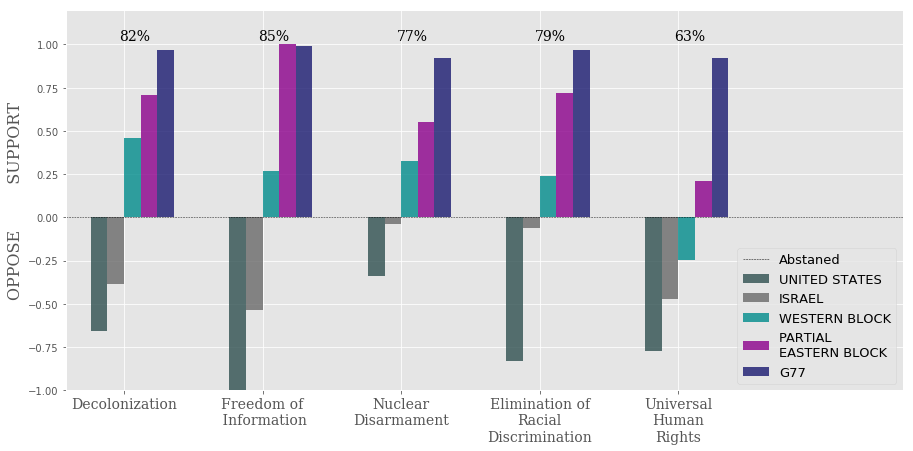

In [32]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkslategrey',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='dimgrey',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN BLOCK'],
        width,
        color='darkcyan',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['PARTIAL EASTERN BLOCK'],
        width,
        color='darkmagenta',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['G77'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['82%','85%','77%','79%','63%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Decolonization','Freedom of\n Information','Nuclear\nDisarmament',\
                    'Elimination of\nRacial\nDiscrimination',"Universal\nHuman\nRights"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','PARTIAL\nEASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [51]:
df=data.query('category == ["Security", "Peace","Developing Countries","Environment","Women"]')

In [52]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,count,126,1,12,1,35


In [53]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,Developing Countries,0.969261,-0.189189,0.638522,-0.815789,0.082778
1,Environment,0.941368,-0.344828,0.877888,-0.533333,0.640853
2,Peace,0.985646,0.314286,0.639175,-0.625000,0.444635
3,Security,0.930715,0.157895,0.824441,-0.200000,0.520471
4,Women,0.974219,0.000000,0.738095,-0.538462,0.612137


In [90]:
df['country'].nunique()

197

In [54]:
#Counting disagreement between countries:

dev=(df1['G77'][0]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][0]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][0]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

env=(df1['G77'][1]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][1]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][1]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

peace=(df1['G77'][2]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][2]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][2]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

sec=(df1['G77'][3]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][3]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][3]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

women=(df1['G77'][4]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][4]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][4]*df2['WESTERN BLOCK'][0])/df['country'].nunique()


# disarm=(df1['G77'][5]*df2['G77'][0] +\
# df1['PARTIAL EASTERN BLOCK'][5]*df2['PARTIAL EASTERN BLOCK'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN BLOCK'][5]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Develop Countries",(dev.round(2)*100),'%' )
print ("Average agreement for Environment",env.round(2))
print ("Average agreement for Peace",peace.round(2))
print ("Average agreement for Security",sec.round(2))
print ("Average agreement for Women",women.round(2))

Average agreement for Develop Countries 75.0 %
Average agreement for Environment 0.86
Average agreement for Peace 0.84
Average agreement for Security 0.83
Average agreement for Women 0.87


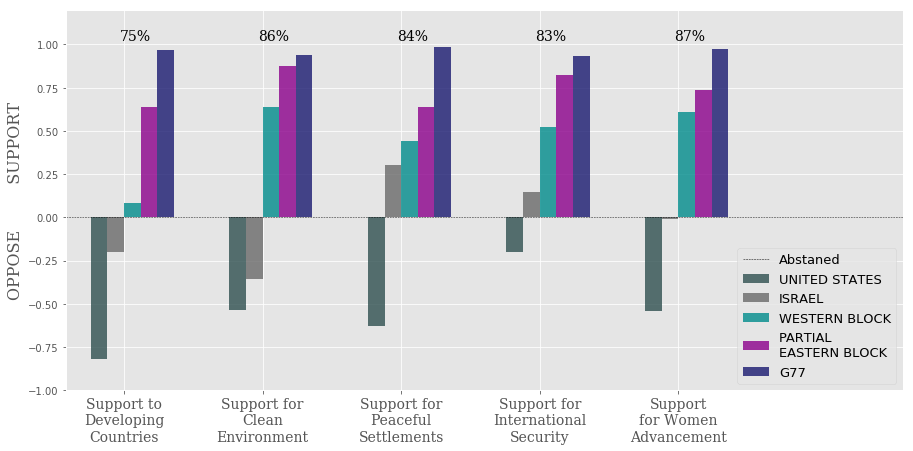

In [59]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkslategrey',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL']-0.01,
        width,
        color='dimgrey',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN BLOCK'],
        width,
        color='darkcyan',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['PARTIAL EASTERN BLOCK'],
        width,
        color='darkmagenta',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['G77'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['75%','86%','84%','83%','87%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Support to\nDeveloping\nCountries','Support for\nClean\nEnvironment','Support for\nPeaceful\nSettlements',\
                    'Support for\nInternational\nSecurity',"Support\nfor Women\nAdvancement"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','PARTIAL\nEASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [60]:
df=data.query('category == ["Special Assistance", "Law of the sea","Children","Cooperation","Democratization"]')

In [61]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,count,126,1,12,1,35


In [62]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,G77,ISRAEL,PARTIAL EASTERN BLOCK,UNITED STATES,WESTERN BLOCK
0,Children,0.955037,0.800000,0.932203,-0.545455,0.879781
1,Cooperation,0.955000,-0.750000,0.766871,-0.722222,0.691415
2,Democratization,0.900217,1.000000,0.982143,1.000000,0.996248
3,Law of the sea,0.956006,0.656250,0.985000,0.394737,0.850407
4,Special Assistance,0.999388,0.909091,1.000000,-0.285714,1.000000


In [63]:
df['country'].nunique()

175

In [64]:
#Counting disagreement between countries:

child=(df1['G77'][0]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][0]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][0]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

coop=(df1['G77'][1]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][1]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][1]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

democ=(df1['G77'][2]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][2]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][2]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

sea=(df1['G77'][3]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][3]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][3]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

assist=(df1['G77'][4]*df2['G77'][0] +\
df1['PARTIAL EASTERN BLOCK'][4]*df2['PARTIAL EASTERN BLOCK'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN BLOCK'][4]*df2['WESTERN BLOCK'][0])/df['country'].nunique()


# disarm=(df1['G77'][5]*df2['G77'][0] +\
# df1['PARTIAL EASTERN BLOCK'][5]*df2['PARTIAL EASTERN BLOCK'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN BLOCK'][5]*df2['WESTERN BLOCK'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Children Rights",(child.round(2)*100),'%' )
print ("Average agreement for Cooperation",coop.round(2))
print ("Average agreement for Democratization",democ.round(2))
print ("Average agreement for Law of the Sea",sea.round(2))
print ("Average agreement for Special assist",assist.round(2))

Average agreement for Children Rights 93.0 %
Average agreement for Cooperation 0.87
Average agreement for Democratization 0.93
Average agreement for Law of the Sea 0.93
Average agreement for Special assist 0.99


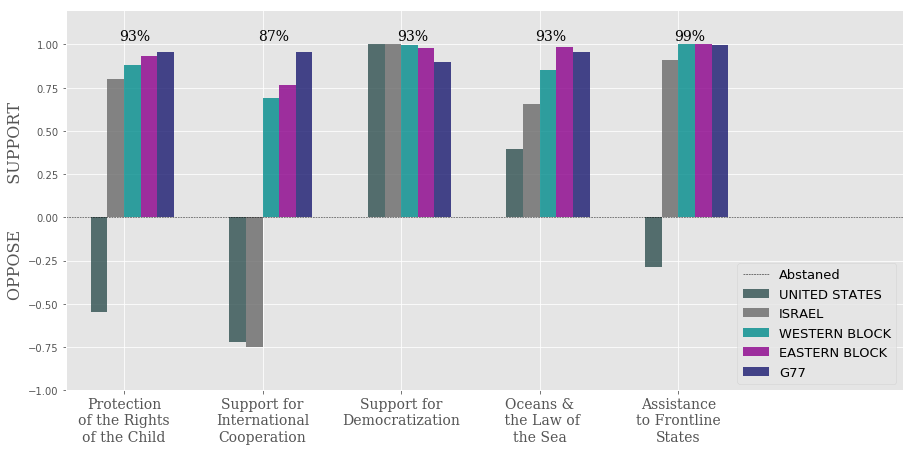

In [66]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkslategrey',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='dimgrey',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN BLOCK'],
        width,
        color='darkcyan',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['PARTIAL EASTERN BLOCK'],
        width,
        color='darkmagenta',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['G77'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['93%','87%','93%','93%','99%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Protection\nof the Rights\nof the Child','Support for\nInternational\nCooperation',\
                    'Support for\nDemocratization',"Oceans &\n the Law of\nthe Sea",\
                    "Assistance\nto Frontline\nStates"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','EASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [55]:
df=data.query('category == ["Special Assistance", "Law of the sea","Children","Cooperation","Economic Order"]')

In [56]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,count,139,14,1,1,42


In [57]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Children,0.949957,0.941176,0.777778,-0.500000,0.865385
1,Cooperation,0.946911,0.737624,-0.473684,-0.476190,0.740113
2,Economic Order,0.985294,0.354037,-0.125000,-0.437500,-0.183258
3,Law of the sea,0.958077,0.956916,0.656250,0.394737,0.858353
4,Special Assistance,0.999388,1.000000,0.909091,-0.285714,1.000000


In [58]:
df['country'].nunique()

197

In [59]:
#Counting disagreement between countries:

child=(df1['DEVELOPING WORLD'][0]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][0]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][0]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

coop=(df1['DEVELOPING WORLD'][1]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][1]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][1]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

order=(df1['DEVELOPING WORLD'][2]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][2]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][2]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

sea=(df1['DEVELOPING WORLD'][3]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][3]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][3]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

assist=(df1['DEVELOPING WORLD'][4]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][4]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][4]*df2['WESTERN EUROPE'][0])/df['country'].nunique()


# disarm=(df1['DEVELOPING WORLD'][5]*df2['DEVELOPING WORLD'][0] +\
# df1['EASTERN EUROPE'][5]*df2['EASTERN EUROPE'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN EUROPE'][5]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Children Rights",(child.round(2)*100),'%' )
print ("Average agreement for Cooperation",coop.round(2))
print ("Average agreement for Order",order.round(2))
print ("Average agreement for Law of the Sea",sea.round(2))
print ("Average agreement for Special assist",assist.round(2))

Average agreement for Children Rights 92.0 %
Average agreement for Cooperation 0.87
Average agreement for Order 0.68
Average agreement for Law of the Sea 0.93
Average agreement for Special assist 0.99


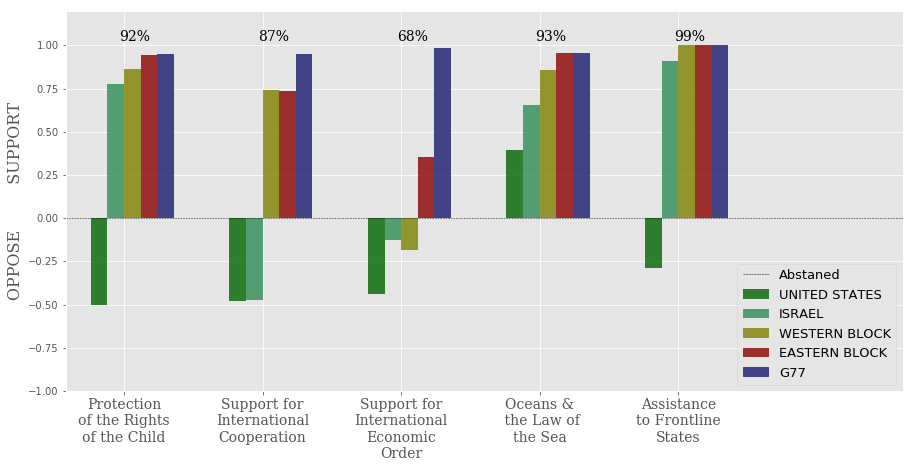

In [60]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkgreen',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='seagreen',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='olive',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='darkred',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['92%','87%','68%','93%','99%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Protection\nof the Rights\nof the Child','Support for\nInternational\nCooperation',\
                    'Support for\nInternational\nEconomic\nOrder',"Oceans &\n the Law of\nthe Sea",\
                    "Assistance\nto Frontline\nStates"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','EASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [89]:
ax.patches

In [32]:
df=data.query('category == ["Universal Human Rights","Decolonization","Economic Order","Developing Countries","Trade and Commodities"]')

In [33]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Decolonization,0.965078,0.604228,-0.532609,-0.792553,0.228986
1,Developing Countries,0.970862,0.610687,-0.189189,-0.815789,0.085009
2,Economic Order,0.985294,0.354037,-0.125000,-0.437500,-0.183258
3,Trade and Commodities,0.862725,0.670103,0.000000,-0.280000,0.523810
4,Universal Human Rights,0.927915,0.182113,-0.435685,-0.747934,-0.232832


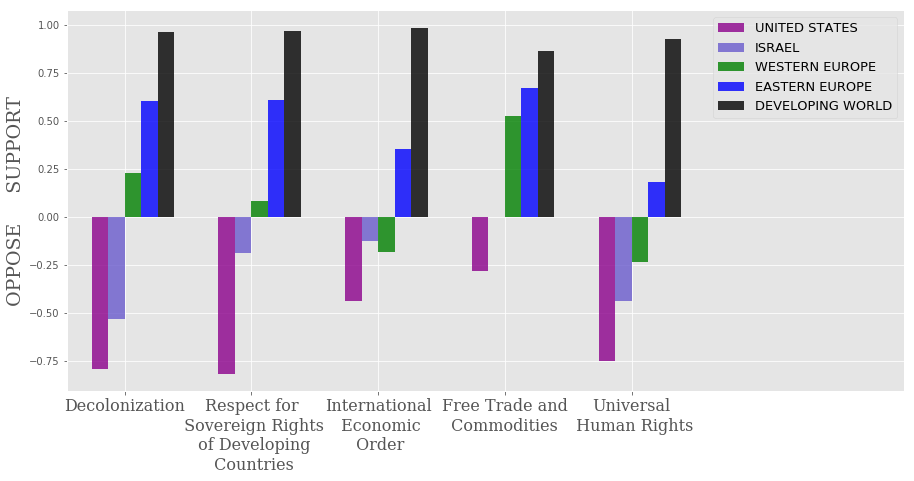

In [34]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)
  

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])


ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Decolonization','Respect for\n Sovereign Rights\n of Developing\n Countries',\
                    'International\n Economic\n Order',\
                    'Free Trade and\n Commodities ','Universal\n Human Rights'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )


plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [35]:
df=data.query('category == ["Racial Discrimination","Women","Children","Peace","Environment"]')

In [36]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Children,0.949957,0.941176,0.777778,-0.500000,0.865385
1,Environment,0.936346,0.861671,-0.333333,-0.516129,0.629929
2,Peace,0.987785,0.635266,0.314286,-0.625000,0.433416
3,Racial Discrimination,0.970904,0.711155,-0.063492,-0.827957,0.224031
4,Women,0.975069,0.797297,0.125000,-0.428571,0.645455


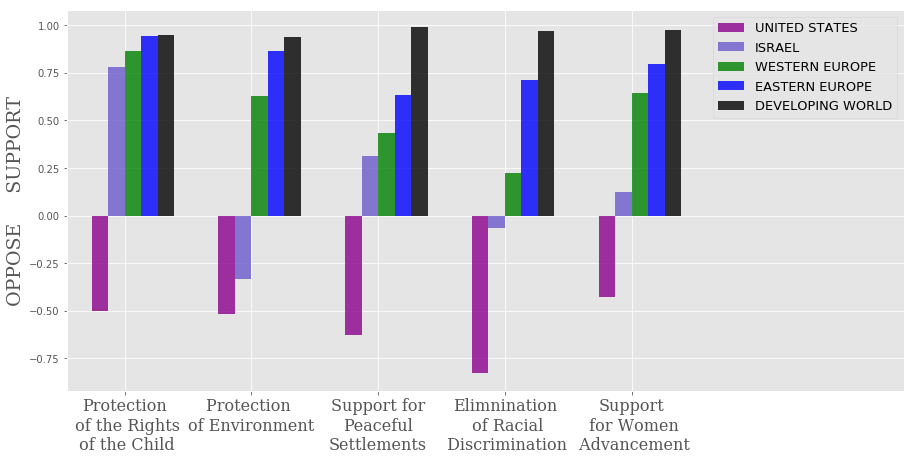

In [37]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k', alpha=.8)
  


# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])


ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])
ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Protection\n of the Rights\n of the Child','Protection \nof Environment',\
                    'Support for\nPeaceful\nSettlements',\
                    'Elimnination\n of Racial\n Discrimination','Support\n for Women\n Advancement'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [40]:
df=data.query('category == ["Arbitrary Executions","Democratization","International Order","Georgian Refugees","Assistance to Refugees"]')

In [41]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Arbitrary Executions,0.597428,0.910891,0.125000,0.500000,0.964856
1,Assistance to Refugees,0.883436,0.034483,0.666667,0.333333,0.888889
2,Democratization,0.901579,0.983784,1.000000,1.000000,0.996485
3,Georgian Refugees,0.061929,0.388430,0.000000,1.000000,0.858268
4,International Order,0.918975,-0.523810,-1.000000,-1.000000,-0.996516


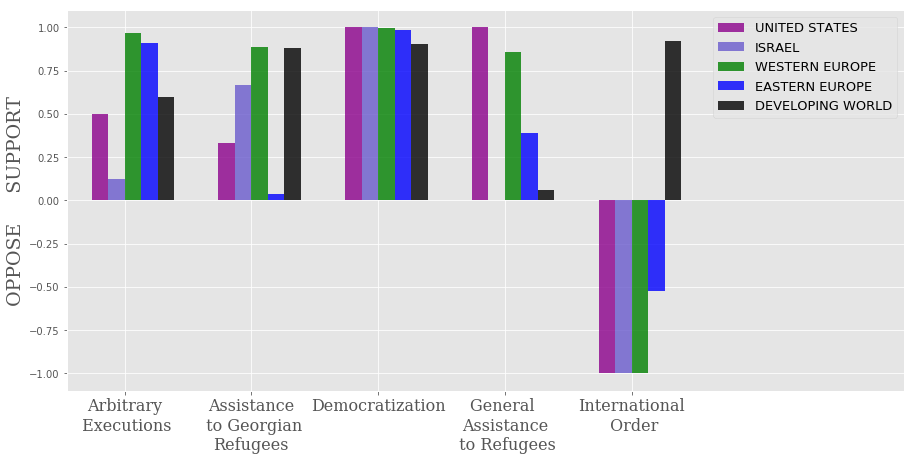

In [42]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k', alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Arbitrary\n Executions','Assistance\n to Georgian\nRefugees',\
                    'Democratization',\
                    'General \nAssistance\n to Refugees','International\n Order'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [71]:
df=data.query('category == ["Cooperation","International Matters","World Social Situation","Death Penalty","Special Assistance"]')

In [72]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Cooperation,0.946911,0.737624,-0.473684,-0.476190,0.740113
1,Death Penalty,0.142303,0.923077,1.000000,-1.000000,0.923729
2,International Matters,0.971044,1.000000,-0.666667,-0.888889,-0.343434
3,Special Assistance,0.999388,1.000000,0.909091,-0.285714,1.000000
4,World Social Situation,0.995745,1.000000,0.000000,-1.000000,0.473684


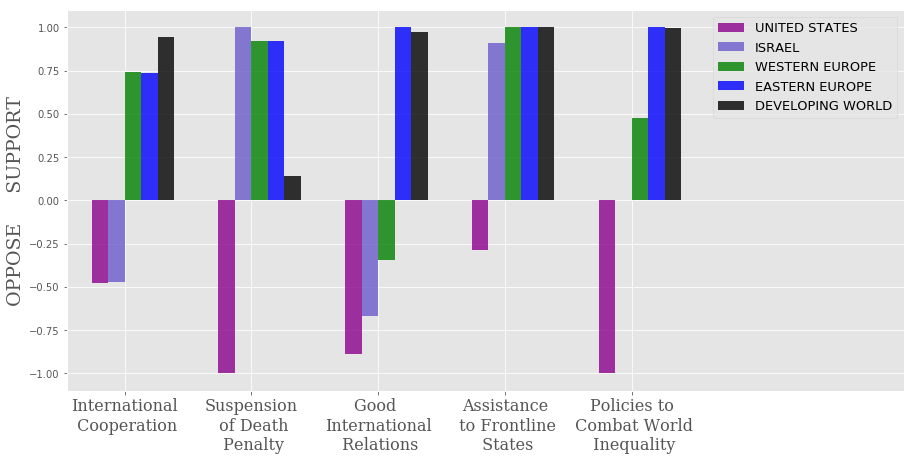

In [75]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['International\n Cooperation','Suspension\n of Death\n Penalty',\
                    'Good \nInternational\n Relations',\
                    'Assistance\n to Frontline\n States','Policies to\n Combat World\n Inequality'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [79]:
df=data.query('category == ["Funding","Security","UN Strengthening","Relations with Host Country","UN and Arab States"]')

In [77]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Funding,0.926166,-0.014245,0.075758,-0.260274,0.566458
1,Relations with Host Country,1.000000,1.000000,-1.000000,-1.000000,0.986928
2,Security,0.931543,0.851658,0.111111,-0.224138,0.456480
3,UN Strengthening,0.959064,0.363636,0.750000,0.375000,0.935323
4,UN and Arab States,0.934959,0.824324,-1.000000,-1.000000,-0.232432


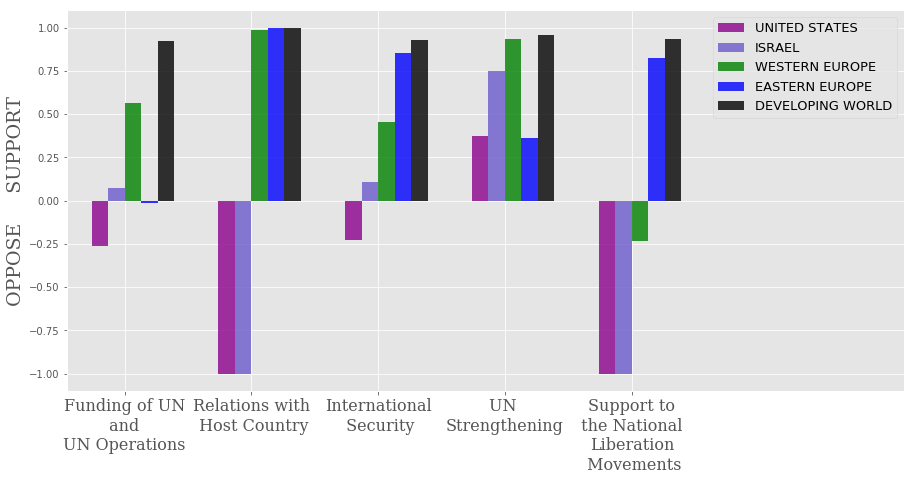

In [78]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Funding of UN\n and \nUN Operations','Relations with\n Host Country',\
                    'International\n Security', 'UN \nStrengthening',\
                    'Support to\n the National \nLiberation\n Movements'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [80]:
df=data.query('category == ["Religion","Arms Treaty","Admin","Science and Technology",\
"Reduction of Military Resources","Objective Infomation on Military Capabilities"]')

In [219]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

cluster1,category,EAST & OTHERS,ISRAEL,UNITED STATES,WEST
0,Admin,0.883357,0.500,0.000000,0.648649
1,Arms Treaty,0.866928,0.800,0.600000,1.000000
2,Objective Infomation on Military Capabilities,0.849722,1.000,1.000000,0.910448
3,Reduction of Military Resources,0.855228,0.500,0.571429,0.726316
4,Religion,0.730769,-0.625,-0.500000,-0.411765
5,Science and Technology,0.927935,-0.020,-0.296296,0.145553


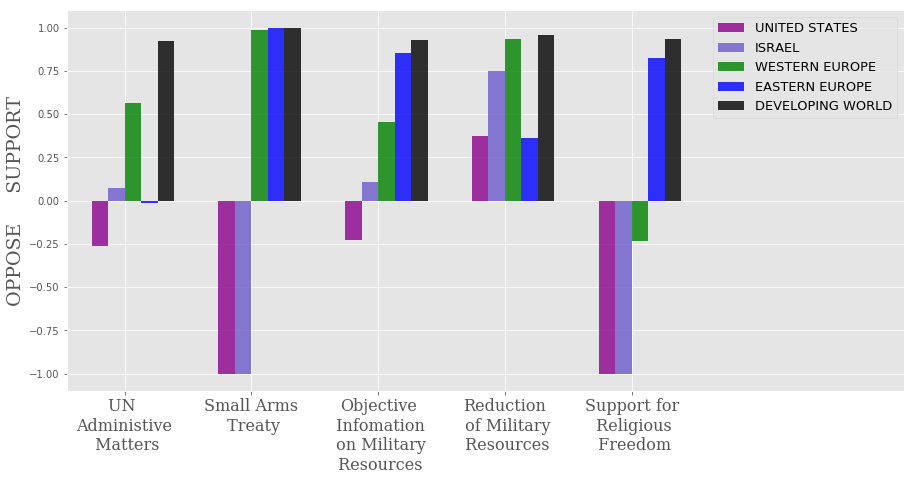

In [81]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['UN \nAdministive\n Matters','Small Arms\n Treaty','Objective\n Infomation\n on Military\n Resources',\
                    'Reduction\n of Military\n Resources',\
                    'Support for\n Religious\n Freedom','Use of\n Science and\n Technology for\n International\n Peace'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [214]:
df3=category[category['category']=='UN and Arab States']

In [215]:
df3

,resolut,descr,vote,descr1,category
1139,A/RES/47/29,observer status of national liberation movements recognized by the organization of african unity andor by the league of arab states,"Y AFGHANISTAN, ALBANIA, Y ALGERIA, Y ANGOLA, Y ANTIGUA AND BARBUDA, A ARGENTINA, Y ARMENIA, A AUSTRALIA, A AUSTRIA, A AZERBAIJAN, Y BAHAMAS, Y BAHRAIN, BANGLADESH, Y BARBADOS, BELARUS, N BELGIUM, Y BELIZE, Y BENIN, BHUTAN, Y BOLIVIA, BOSNIA AND HERZEGOVINA, Y BOTSWANA, Y BRAZIL, Y BRUNEI DARUSSALAM, A BULGARIA, Y BURKINA FASO, BURUNDI, CAMBODIA, Y CAMEROON, A CANADA, CAPE VERDE, Y CENTRAL AFRICAN REPUBLIC, Y CHAD, Y CHILE, Y CHINA, Y COLOMBIA, COMOROS, Y CONGO, A COSTA RICA, Y COTE D'IVOIRE, CROATIA, Y CUBA, Y CYPRUS, A CZECHOSLOVAKIA, Y DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA, A DENMARK, Y DJIBOUTI, DOMINICA, DOMINICAN REPUBLIC, Y ECUADOR, Y EGYPT, Y EL SALVADOR, EQUATORIAL GUINEA, A ESTONIA, Y ETHIOPIA, FIJI, A FINLAND, N FRANCE, Y GABON, Y GAMBIA, GEORGIA, N GERMANY, Y GHANA, A GREECE, Y GRENADA, Y GUATEMALA, Y GUINEA, Y GUINEA-BISSAU, GUYANA, Y HAITI, Y HONDURAS, A HUNGARY, A ICELAND, Y INDIA, Y INDONESIA, Y IRAN (ISLAMIC REPUBLIC OF), Y IRAQ, A IRELAND, N ISRAEL, N ITALY, JAMAICA, A JAPAN, Y JORDAN, THE REPUBLIC OF KAZAKHSTAN, Y KENYA, Y KUWAIT, KYRGYZSTAN, LAO PEOPLE'S DEMOCRATIC REPUBLIC, A LATVIA, Y LEBANON, Y LESOTHO, Y LIBERIA, Y LIBYAN ARAB JAMAHIRIYA, A LIECHTENSTEIN, A LITHUANIA, N LUXEMBOURG, Y MADAGASCAR, Y MALAWI, Y MALAYSIA, Y MALDIVES, Y MALI, A MALTA, A MARSHALL ISLANDS, Y MAURITANIA, MAURITIUS, Y MEXICO, A MICRONESIA (FEDERATED STATES OF), MONGOLIA, Y MOROCCO, Y MOZAMBIQUE, Y MYANMAR, Y NAMIBIA, Y NEPAL, N NETHERLANDS, A NEW ZEALAND, Y NICARAGUA, Y NIGER, Y NIGERIA, A NORWAY, Y OMAN, Y PAKISTAN, Y PANAMA, Y PAPUA NEW GUINEA, Y PARAGUAY, Y PERU, Y PHILIPPINES, A POLAND, A PORTUGAL, Y QATAR, A REPUBLIC OF KOREA, REPUBLIC OF MOLDOVA, A ROMANIA, A RUSSIAN FEDERATION, Y RWANDA, SAINT KITTS AND NEVIS, SAINT LUCIA, Y SAINT VINCENT AND THE GRENADINES, SAMOA, A SAN MARINO, Y SAO TOME AND PRINCIPE, Y SAUDI ARABIA, Y SENEGAL, Y SEYCHELLES, Y SIERRA LEONE, Y SINGAPORE, SLOVENIA, SOLOMON ISLANDS, SOMALIA, SOUTH AFRICA, A SPAIN, Y SRI LANKA, Y SUDAN, Y SURINAME, Y SWAZILAND, A SWEDEN, Y SYRIAN ARAB REPUBLIC, TAJIKISTAN, Y THAILAND, Y TOGO, Y TRINIDAD AND TOBAGO, Y TUNISIA, A TURKEY, TURKMENISTAN, Y UGANDA, A UKRAINE, Y UNITED ARAB EMIRATES, N UNITED KINGDOM, Y UNITED REPUBLIC OF TANZANIA, N UNITED STATES, Y URUGUAY, UZBEKISTAN, VANUATU, Y VENEZUELA (BOLIVARIAN REPUBLIC OF), Y VIET NAM, Y YEMEN, YUGOSLAVIA, DEMOCRATIC REPUBLIC OF THE CONGO, Y ZAMBIA, Y ZIMBABWE,Export,\n",observerstatusofnationalliberationmovementsrecognizedbytheorganizationofafricanunityandorbytheleagueofarabstates,UN and Arab States
1526,A/RES/45/37,observer status of national liberation movements recognized by the organization of african unity andor by the league of arab states,"Y AFGHANISTAN, Y ALBANIA, Y ALGERIA, Y ANGOLA, Y ANTIGUA AND BARBUDA, Y ARGENTINA, A AUSTRALIA, A AUSTRIA, Y BAHAMAS, Y BAHRAIN, Y BANGLADESH, Y BARBADOS, N BELGIUM, Y BELIZE, Y BENIN, Y BHUTAN, Y BOLIVIA, Y BOTSWANA, Y BRAZIL, Y BRUNEI DARUSSALAM, A BULGARIA, Y BURKINA FASO, Y BURUNDI, Y BELARUS, CAMBODIA, Y CAMEROON, A CANADA, Y CAPE VERDE, Y CENTRAL AFRICAN REPUBLIC, Y CHAD, Y CHILE, Y CHINA, Y COLOMBIA, Y COMOROS, Y CONGO, A COSTA RICA, Y COTE D'IVOIRE, Y CUBA, Y CYPRUS, A CZECHOSLOVAKIA, A DENMARK, Y DJIBOUTI, A DOMINICA, Y DOMINICAN REPUBLIC, Y ECUADOR, Y EGYPT, A EL SALVADOR, EQUATORIAL GUINEA, Y ETHIOPIA, Y FIJI, A FINLAND, N FRANCE, Y GABON, Y GAMBIA, N GERMANY, Y GHANA, A GREECE, Y GRENADA, Y GUATEMALA, Y GUINEA, Y GUINEA-BISSAU, Y GUYANA, Y HAITI, A HONDURAS, A HUNGARY, A ICELAND, Y INDIA, Y INDONESIA, Y IRAN (ISLAMIC REPUBLIC OF), Y IRAQ, A IRELAND, N ISRAEL, N ITALY, Y JAMAICA, A JAPAN, Y JORDAN, Y KENYA, Y KUWAIT, Y LAO PEOPLE'S DEMOCRATIC REPUBLIC, Y LEBANON, Y LESOTHO, LIBERIA, Y LIBYAN ARAB JAMAHIRIYA, A LIECHTENSTEIN, N LUXEMBOURG, Y MADAGASCAR, Y MALAWI, Y MALAYSIA, Y MALDIVES, 

In [182]:
https://stackoverflow.com/questions/25793731/matplotlib-how-to-get-space-between-bars

array([1, 2, 3, 4, 5])